In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = False

In [2]:
import sys 
import os
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData



from Interpolation_Class import Interpolation

In [3]:
CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


In [42]:
site = 'SiteB'

core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']


DataAll = GetCoreData(site)

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']
N_InInt = 32

In [43]:
CoresSpecs

,CoreName,dLaki,dTamb,Accum0,T0,dens0,z0,lenLaki,lenTamb,densLaki,densTamb
0,Crete,74.75,64.7,0.280,-30.40,NaN,NaN,47.3,49.3,823.0,791.0
1,Milcent,NaN,NaN,0.530,-22.30,NaN,NaN,NaN,NaN,NaN,NaN
2,CampCentury,91.50,78.5,0.380,-24.29,NaN,NaN,21.7,24.0,899.0,883.0
3,SiteA,80.85,70.9,0.307,-29.41,343.0,0.550,30.0,65.0,836.0,812.0
4,SiteB,83.70,73.0,0.327,-29.77,355.0,0.550,45.0,55.0,841.0,816.0
5,SiteC,NaN,NaN,0.340,-29.10,NaN,NaN,NaN,NaN,NaN,NaN
6,SiteD,93.80,81.5,0.365,-28.30,350.0,0.825,55.0,70.0,857.0,839.0
7,SiteE,62.95,53.4,0.225,-30.37,325.0,0.675,35.0,40.0,786.0,749.0
8,SiteF,NaN,NaN,0.237,-30.40,NaN,NaN,NaN,NaN,NaN,NaN
9,SiteG,69.40,60.5,0.251,-30.10,NaN,NaN,35.0,75.0,807.0,778.0


In [44]:
dataAll = pd.DataFrame({'depth':depth_LT,'d18O':d18O_LT}, index=None)

inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)
dataMin, peaksMin, N_peaksMin, dataMax, peaksMax, N_peaksMax = inst.BackDiffuse_Theo()

depthOpt, dataOpt, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data = inst.backDiffused(theoDiffLen=True,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15, interpAfterDecon=True, newDelta=0.01)

Theo. sigma Min: 6.43 [cm]
Theo. sigma Max: 6.61 [cm]
Starting sigma: 5.43 [cm]
100. Npeaks: 33, diffLen: 4.430 cm
200. Npeaks: 33, diffLen: 3.430 cm
Final sigma: 3.26 [cm]
Final # of peaks: 32
Delta: 0.038
Delta new: 0.010


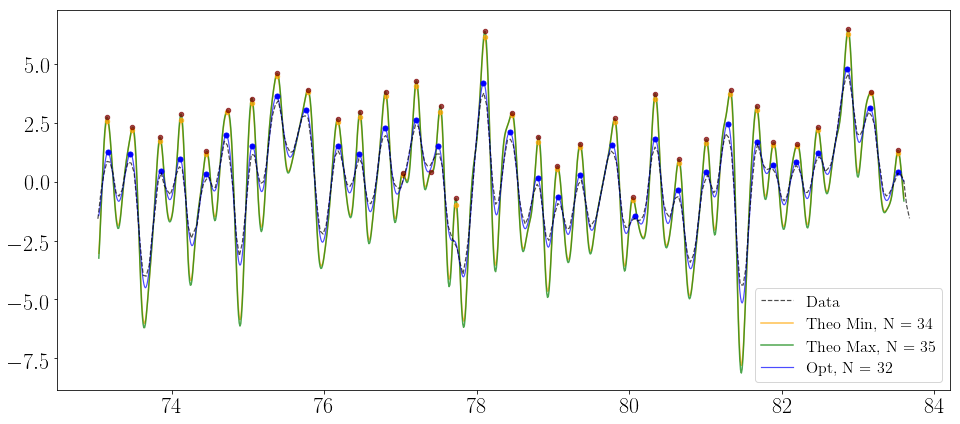

In [45]:
depth0 = dataMin['depth']
data0 = dataMin['d18O']
depth1 = dataMax['depth']
data1 = dataMax['d18O']


fig, ax = plt.subplots(figsize=(16,7))

plt.plot(np.asarray(depth_LT), np.asarray(d18O_LT)-np.mean(np.asarray(d18O_LT)), lw=1.2, label='Data', ls='--', color='k', alpha=0.7)
plt.plot(depth0,data0, label=f'Theo Min, N = {N_peaksMin}',zorder=-1, color='orange', alpha=0.7)
plt.plot(depth1,data1, label=f'Theo Max, N = {N_peaksMax}',zorder=-1, color='green', alpha=0.7)
plt.plot(depthOpt, dataOpt, label=f'Opt, N = {len(peaks)}',zorder=-1, color='b', alpha=.7, lw=1.2)

plt.legend(fontsize=16)

plt.scatter(depth0[peaksMin],data0[peaksMin], color='orange',zorder=1, s=20, alpha=0.7)
plt.scatter(depth1[peaksMax],data1[peaksMax], color='maroon',zorder=1, s=20, alpha=0.7)
plt.scatter(depthOpt[peaks],dataOpt[peaks], color='b',zorder=1, s=25)


fig.savefig('../WrittenWork/Figures/'+site+'_TheoDiffLens.png', bbox_inches='tight')

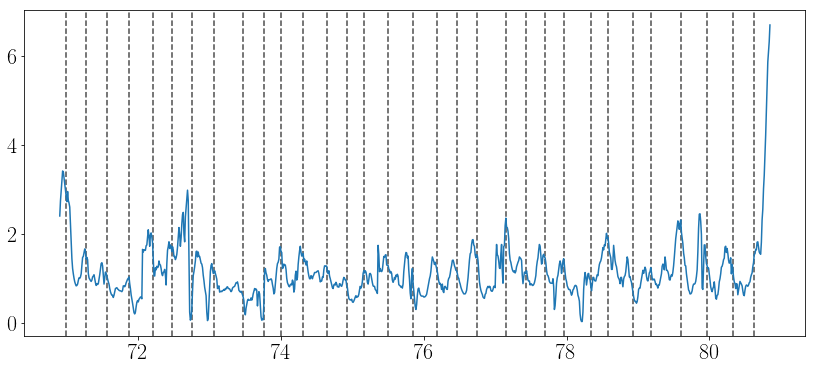

In [40]:
fig, ax = plt.subplots(figsize=(14,6))

for i in range(len(peaks)):
    plt.axvline(x=depthOpt[peaks[i]], color='k', alpha=0.7,ls='--')
plt.plot(data_ECM_LT['depth'], data_ECM_LT['ECM'])
